# Redes Neurais e Aprendizado Profundo
SCC0270 - 2/2022


## Trabalho 1 - Redes Densas e Convolucionais

NOME: Bruno Paiva Sant'Anna

NUSP: 11819507

NOME: Ricardo Yudi Takahashi

NUSP: 11831297

Neste trabalho você deverá implementar duas redes neurais usando Pytorch, uma utilizando camadas densas e outra utilizando camadas convolucionais. Será utilizado o dataset Fashion MNIST.

### Instruções:

- Preencha o nome e o número USP da dupla na célula acima;
- Renomeie o notebook, inserindo o número USP de cada um da dupla, conforme o exemplo: "SCC0270-T1-1234567-7654321";
- Neste notebook, você irá encontrar 5 exercícios, cada um deles valendo uma certa quantidade de pontos. A conclusão de todos os exercícios com sucesso valerá nota 10;
- Responda cada exercício inserindo o código adequado para cada função.
- Envie o notebook inteiro como entrega do exercício.
- Certifique-se de que os códigos executam corretamente, uma vez que a nota só será atribuída caso seja possível executar o código, e ele esteja correto.
- Fraudes ou plágio implica em nota zero e possíveis medidas administrativas.


### Objetivos:

- Compreender como o aprendizado de máquina consegue resolver problemas que métodos tradicionais de programação não conseguem
- Aprender sobre o dataset público Fashion MNIST
- Observar as diferenças do uso de camadas densas e convolucionais

### Imports

In [ ]:
from torchvision import datasets, transforms, utils

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Selecionar GPU caso disponível
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### Dataset Fashion-MNIST

### Dados, Anotações e Subsets

- `train_set`: Imagens usadas para treinar a rede neural. Contém anotações corretas para cada imagem de `train_set`, usado para avaliar as predições do modelo durante a fase de treinamento.
- `test_set`: Imagens usadas para avaliar o desempenho do modelo, uma vez que ele já foi treinado. Contém anotações corretas para cada imagem de `test_set`, usado para avaliar as predições do modelo durante a fase de validação


### Importar dados para a memória

In [ ]:
# Fazer o download dos dados

train_set = datasets.FashionMNIST(
    "./data", 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

test_set = datasets.FashionMNIST(
    "./data", 
    download=True, 
    train=False, 
    transform=transforms.Compose([transforms.ToTensor()])
) 
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### Explorando o dataset

In [ ]:
# Tamanho do dataset
len(train_set)

60000

In [ ]:
# Vamos observar o que é cada loader
example = next(iter(train_loader))
example[0].size()

torch.Size([100, 1, 28, 28])

9


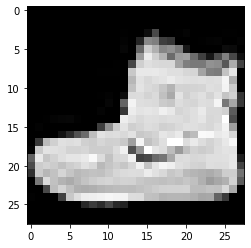

In [ ]:
# Uma imagem do train_set, com sua respectiva label
img, label = next(iter(train_set))
plt.imshow(img.squeeze(), cmap="gray")
print(label)

In [ ]:
# Função de ajuda para ler o que significa cada label
def convert_label(label):
    output_mapping = {
        0: "T-shirt/Top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat", 
        5: "Sandal", 
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot"
    }
    
    if type(label) == torch.Tensor:
        input = label.item()  
    else:
        input = label
    if label>9:
        input = 9
    if label<0:
        input = 0
                 
    return output_mapping[input]
 

In [ ]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])
labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

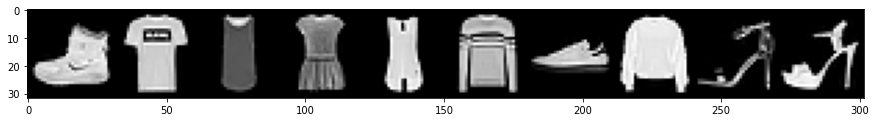

In [ ]:
# Vamos observar algumas imagens do Fashion MNIST

demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

grid = utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(convert_label(label), end=", ")

### Exercício 1 (3 pontos)

**Exercício**: Neste trabalho, será necessário implementar duas arquiteturas distintas de redes neurais. Uma vez que elas estejam implementadas, será necessário executar o laço (loop) de treinamento dos modelos por diversas épocas. Para isso, nesse primeiro exercício, crie uma função genérica, capaz de receber um modelo Pytorch e executar os passos básicos de propagação, cálculo do erro, retropropagação e atualização dos pesos. Essa função será utilizada nos exercícios seguintes para treinar os modelos por você implementados. Implemente o laço de treinamento de um modelo por num_epochs.

**Instruções**:
- Implemente os passos de propagação (forward)
- Realize o cálculo do erro usando um critério genérico fornecido pela assinatura da função
- Inicialize os gradientes a zero
- Implemente o passo de retropropagação do erro (backpropagation)
- Faça um passo de otimização
- DICA: como essas linhas estão englobadas em uma função, utilize os argumentos da função fit(...), de forma genérica


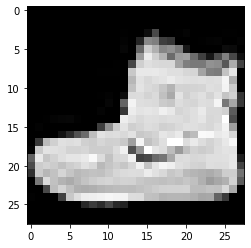

In [ ]:
imgs, labels = next(iter(train_loader))
img = imgs[0].squeeze()
label = labels[0].item()
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def fit(model, criterion, optimizer, train_loader, test_loader, num_epochs=5):
    model.to(device)
    
    #criação de vetores
    train_losses = [] #perdas dos dados de treinamento
    test_losses = []  #perdas dos dados de teste
    
    # Lists for visualization of loss and accuracy 
    accuracy_list = [] 

    # Lists for knowing classwise accuracy
    predictions_list = []
    labels_list = []

    for epoch in range(num_epochs):
        running_loss = 0

        for images, labels in train_loader: #train_loader é um batch
            # Transfering images and labels to GPU if available
            images, labels = images.to(device), labels.to(device)
            labels = labels 
            #target = F.one_hot(labels, num_classes=10).float()

              
            

            ### INÍCIO DO CÓDIGO ### (≈ 5 linhas)
            optimizer.zero_grad()  # zera o gradiente
            outputs = model(images)  # propagação
            loss = criterion(outputs, labels)  # cálculo do erro
            loss.backward()  # retropropagação
            optimizer.step()  # otimização
            
            ### FIM DO CÓDIGO ###

            running_loss += loss.item()

        else:
        # Testing the model

            with torch.no_grad():
                # Set the model to evaluation mode
                model.eval()

                total = 0
                test_loss = 0
                correct = 0

                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)
                    labels_list.append(labels)
                    total += len(labels)
                    
                    ### INÍCIO DO CÓDIGO ### (≈ 1 linha)

                    outputs = model(images) # realiza o cálculo com as imagens de teste

                    ### FIM DO CÓDIGO ###
                    
                    predictions = torch.max(outputs, 1)[1].to(device)
                    predictions_list.append(predictions)
                    correct += (predictions == labels).sum()

                    test_loss += criterion(outputs, labels).item()
                test_losses.append(test_loss/len(test_loader))

                accuracy = correct * 100 / total
                accuracy_list.append(accuracy.item())
            

            # Set the model to training mode
            model.train()
        
        train_losses.append(running_loss/len(train_loader))

        print(f'Epoch {epoch+1}/{num_epochs} .. Train Loss: {train_losses[-1]:.5f} .. Test Loss: {test_losses[-1]:.5f} .. Test Accuracy: {accuracy_list[-1]:.3f}%')

            
    results = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy_list': accuracy_list
    }
    
    return results

### Exercício 2 - Camadas Densas (2 pontos)

**Exercício 2.A**: Implemente uma rede neural, usando camadas densas (fully connected), capaz de classificar as imagens do dataset Fashion MNIST. Descreva e justifique a escolha dos parâmetros e das camadas.

**Instruções**:
- Inicialize a superclasse
- Crie o projeto da rede neural usando camadas densas
- Implemente o passo de propagação
- Insira uma célula de texto, ou comentários ao longo do código com a justificativa

In [ ]:
class NetworkDense(nn.Module):

    def __init__(self):
        
        ### INÍCIO DO CÓDIGO ### (≈ 5 linhas)
        super(NetworkDense, self).__init__()

        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 10)
        
        ### FIM DO CÓDIGO ###
     
    def forward(self, x):
        
        ### INÍCIO DO CÓDIGO ### (≈ 5 linhas)
        
        x = torch.flatten(x, 1)# achata a entrada x em uma dimensão
        x = F.relu(self.fc1(x))# relu como ativação
        x = F.softmax(self.fc2(x), dim=1) #camada densa linear, no formato de one hot encoding
        return x
        ### FIM DO CÓDIGO ###
        
       


In [ ]:
# Justifique a escolha da arquitetura

# A arquitetura de duas camadas mostrou-se capaz de uma grande quantidade de acertos,
# sem utilizar muito espaço, por ter não muitos parâmetros

**Exercício 2.B**: Utilizando a classe `NetworkDense` implementada anteriormente, inicialize o modelo, defina uma função para loss, o otimizador, e a learning rate desejados. Depois, treine o modelo por algumas épocas.

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 4 linhas)
model_dense = NetworkDense()
criterion = nn.CrossEntropyLoss() # mean squared error para função de loss
learning_rate = 0.2
optimizer = optim.SGD(model_dense.parameters(), lr = learning_rate)
### FIM DO CÓDIGO ###

print(model_dense)

NetworkDense(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
img, label = next(iter(train_loader))
out = model_dense(img)
print(img.size())
print(out.size())
print(label.size())

torch.Size([100, 1, 28, 28])
torch.Size([100, 10])
torch.Size([100])


In [ ]:
img, label = next(iter(train_loader))
out = model_dense(img)
target = F.one_hot(label, num_classes=10).float()
loss = criterion(out,target)
print(loss)
print(out.size())
print(target.size())
print(target[1], out[1])

tensor(2.3025, grad_fn=<DivBackward1>)
torch.Size([100, 10])
torch.Size([100, 10])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) tensor([0.1224, 0.0893, 0.0853, 0.1122, 0.0926, 0.1024, 0.1102, 0.0831, 0.1037,
        0.0989], grad_fn=<SelectBackward0>)


In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 1 linha)
#for learning_rate in np.linspace(0.001, 0.1, 3):
   
#print('Utilizando lr=', learning_rate)
den_results = fit(model_dense, criterion, optimizer, train_loader, test_loader, num_epochs=100)
   
### FIM DO CÓDIGO ###

Epoch 1/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 2/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 3/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 4/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 5/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 6/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 7/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 8/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 9/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 10/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 11/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
Epoch 12/100 .. Train Loss: 1.62750 .. Test Loss: 1.65877 .. Test Accuracy: 80.110%
E

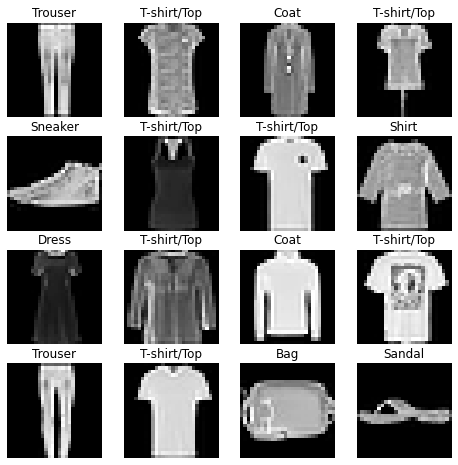

In [ ]:
#para visualizar melhor:
figure = plt.figure(figsize=(8,8))
cols, rows = 4, 4
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    out = model_dense(img)
    label_out = out.argmax().item()
    figure.add_subplot(rows, cols, i)
    plt.title(convert_label(label_out))
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### Exercício 3  - Camadas Convolucionais (2 pontos)

**Exercício 3.A**: Implemente uma rede neural, usando camadas convolucionais (Conv2d), capaz de classificar as imagens do dataset Fashion MNIST. Descreva e justifique a escolha dos parâmetros e das camadas.

**Instruções**:
- Inicialize a superclasse
- Crie o projeto da rede neural usando camadas convolucionais
- Implemente o passo de propagação
- Insira uma célula de texto, ou comentários ao longo do código com a justificativa

In [ ]:
class NetworkCNN(nn.Module):
    
    def __init__(self):
        super(NetworkCNN, self).__init__()
        ### INÍCIO DO CÓDIGO ### 

        self.conv1 = nn.Conv2d(1, 6, 5)      #1 canal de entrada, 6 canais de saída, kernel size=5 (5x5)
        self.pool = nn.MaxPool2d(2, 2)       #tamanho 2x2, stride/passo 2
        self.conv2 = nn.Conv2d(6, 16, 5)     #6 canais de entrada, 16 canais de saída, kernel size=5 (5x5)
        self.fc1 = nn.Linear(16*4*4, 100)    #mlp gera 100 saídas
        self.fc2 = nn.Linear(100, 10)        #mlp gera 10 saídas (as classes do dataset)

        ### FIM DO CÓDIGO ###
        
        
    def forward(self, x):
        
        ### INÍCIO DO CÓDIGO ### 
        
        x = F.relu(self.conv1(x))            #ReLu após a primeira camada convolucional (sem negativos)
        x = self.pool(x)                     #MaxPool2d: reduz o tamanho do sample
        x = F.relu(self.conv2(x))            #ReLu após a segunda camada convolucional
        x = self.pool(x)                     #MaxPool2d: reduz o tamanho do sample
        x = torch.flatten(x, 1)              #Ajusta a entrada para as duas últimas camadas
        x = F.relu(self.fc1(x))              #ReLu após a primeira MLP
        x = F.softmax(self.fc2(x), dim=1)    #Softmax após a segunda MLP para transformar em probabilidades. 
        
        ### FIM DO CÓDIGO ###
        
        return x

In [ ]:
# Justifique a escolha da arquitetura

# A arquitetura escolhida foi a arquitetura sequencial. Ela foi escolhida por conta da simplicidade
# de implementação e o número reduzido de camadas faz com que o tempo de treinamento não seja muito elevado

**Exercício 3.B**: Utilizando a classe `NetworkCNN` implementada anteriormente, inicialize o modelo, defina uma função para loss, o otimizador, e a learning rate desejados. Depois, treine o modelo por algumas épocas.

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 4 linhas)
model_cnn = NetworkCNN()# ...
criterion = nn.CrossEntropyLoss()# ...
learning_rate = 0.1# ...
optimizer = optim.SGD(model_cnn.parameters(), lr=learning_rate)# ...
### FIM DO CÓDIGO ###

print(model_cnn)

NetworkCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 1 linha)
#for learning_rate in np.linspace(0.001, 0.5, 3):
#print('Utilizando lr=', learning_rate)
cnn_results = fit(model_cnn, criterion, optimizer, train_loader, test_loader, num_epochs=100)#...
### FIM DO CÓDIGO ###

Epoch 1/100 .. Train Loss: 2.06334 .. Test Loss: 1.87636 .. Test Accuracy: 58.310%
Epoch 2/100 .. Train Loss: 1.82625 .. Test Loss: 1.82381 .. Test Accuracy: 63.880%
Epoch 3/100 .. Train Loss: 1.79327 .. Test Loss: 1.78987 .. Test Accuracy: 67.140%
Epoch 4/100 .. Train Loss: 1.77718 .. Test Loss: 1.77459 .. Test Accuracy: 68.770%
Epoch 5/100 .. Train Loss: 1.76663 .. Test Loss: 1.76964 .. Test Accuracy: 69.330%
Epoch 6/100 .. Train Loss: 1.76006 .. Test Loss: 1.77070 .. Test Accuracy: 68.930%
Epoch 7/100 .. Train Loss: 1.75310 .. Test Loss: 1.75952 .. Test Accuracy: 70.130%
Epoch 8/100 .. Train Loss: 1.74719 .. Test Loss: 1.75794 .. Test Accuracy: 70.240%
Epoch 9/100 .. Train Loss: 1.74225 .. Test Loss: 1.75635 .. Test Accuracy: 70.430%
Epoch 10/100 .. Train Loss: 1.73902 .. Test Loss: 1.75557 .. Test Accuracy: 70.630%
Epoch 11/100 .. Train Loss: 1.73661 .. Test Loss: 1.74434 .. Test Accuracy: 71.710%
Epoch 12/100 .. Train Loss: 1.73400 .. Test Loss: 1.74621 .. Test Accuracy: 71.600%
E

### Exercício 4  - Quantidade de parâmetros treináveis (1 ponto)

**Exercício**: Quantos parâmetros treináveis cada um dos modelos desenvolvidos possui? Justifique. Informe os valores para `model_dense` e `model_cnn`.

## **Parâmetros de `model_dense`**

* Camada 1: 784 entradas, 32 saídas



> Como há 32 saídas, há 32 neurônios, com 784 valores de pesos para cada um + 32 bias



* Camada 2: 32 entradas, 10 saídas

>Como há 10 saídas, há 10 neurônios, com 32 valores de pesos para cada um + 10 bias.
---
$(32*784+32)+(10*32+10) = 25450$ parâmetros







## **Parâmetros de `model_cnn`**

* Camada convolucional 1: 1 canal de entrada, filtro 5x5, 6 canais de saída





>Como a entrada tem um canal e o filtro é 5x5, o filtro é 5x5x1.

>Como são 6 canais de saída, teremos 6 filtros 5x5x1 diferentes

* Camada convolucional 2: 6 canais de entrada, filtro 5x5, 16 canais de saída

>Como a entrada tem 6 canais e o filtro 5x5, o filtro é 5x5x6

>Como são 16 canais de saída, teremos 16 filtros 5x5x6 diferentes

* Camada densa 1: 256 entradas, 100 saídas
 
>Como há 100 saídas, há 100 neurônios com 256 valores de peso para cada + 100 bias

* Camada densa 2: 100 entradas, 10 saídas

>Como há 10 saídas, há 10 neurônios com 100 valores de peso para cada + 10 bias
---
$(6*5*5*1)+(16*5*5*6)+(256*100+100)+(100*10+10)=26260$ parâmetros



### Exercício 5 - Comparação de Resultados (2 pontos)

**Exercício**: Compare as métricas de acurácia dos dois modelos desenvolvidos. Qual dos dois obteve melhores resultados?  Por quê? Qual característica das redes que justificam seu desempenho?

Utilize o gráfico para auxiliar na análise. Insira uma célula de texto com a sua resposta

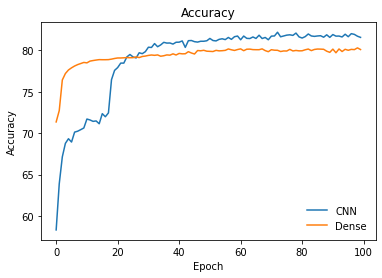

In [ ]:
### INÍCIO DO CÓDIGO ### (≈ 2 linhas)
plt.plot(cnn_results['accuracy_list'], label='CNN')
plt.plot(den_results['accuracy_list'], label='Dense')
### FIM DO CÓDIGO ###

plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

A rede convolucional, como esperado, obteve um resultado melhor depois de treinada adequadamente, por possuir mais parâmetros e por possuir um melhor aproveitamento das relações locais dos pixels da imagem de entrada. Como há mais parâmetros na rede convolucional, ela demora mais a ser treinada adequadamente e, portanto, nas primeiras éepocas a rede densa apresenta um melhor resultado.

### Indo além... - Comparação de Resultados (sem ponto)

É possível plotar o gráfico de loss do treino e da validação para cada um dos modelos. Observe como os erros se comportam de maneira diferente para cada um dos subsets.

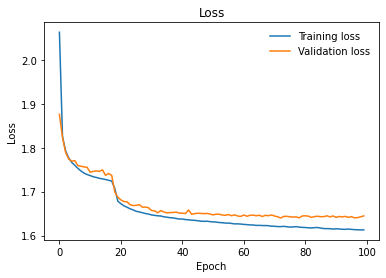

In [ ]:
plt.plot(cnn_results['train_losses'], label='Training loss')
plt.plot(cnn_results['test_losses'], label='Validation loss')

plt.legend(frameon=False)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

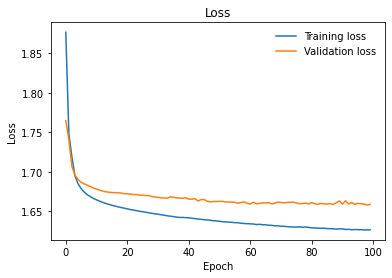

In [ ]:
plt.plot(den_results['train_losses'], label='Training loss')
plt.plot(den_results['test_losses'], label='Validation loss')

plt.legend(frameon=False)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

O ponto mais relevante na comparação dos dois gráficos é a diferença entre a Loss do dataset de treino e validação. Além da Loss ser mais baixa, o modelo CNN apresenta uma maior proximidade entre os dois datasets, ou seja, a rede é melhor utilizada para classificar dados externos ao conjunto de treino. 

Isso é importante pois uma Loss muito pequena no conjunto de treino não implica em uma rede melhor, pois o modelo pode apresentar Overfitting, que é quando há um vício no dataset de treino, fazendo com que a rede não seja uma boa classificadora para dados de fora desse dataset.